In [29]:
import numpy as np


In [30]:
class Neuronio():

    def __init__(self, entrada, taxa_aprendizado=0.1):
        self.pesos = np.random.rand(entrada)
        self.bias = 0.0
        self.taxa_aprendizado = taxa_aprendizado

    def forward(self, entrada):
        soma = np.dot(entrada, self.pesos) + self.bias
        saida_ativada = self._ativacao(soma)
        return soma, saida_ativada

    def _ativacao(self, x):
        return 1 if x >= 1 else 0

    def treinar(self, entrada, esperado):
        saida_bruta, saida = self.forward(entrada)
        erro = esperado - saida
        self.pesos += self.taxa_aprendizado * erro * np.array(entrada)
        self.bias += self.taxa_aprendizado * erro
        return saida, erro


In [31]:
entradas = [0,1,0,0,0,0,0,0,0,0]
esperado = 1

neuronio = Neuronio(entrada=10, taxa_aprendizado=0.1)

In [32]:
# Treino

for epoca in range(10):
    saida, erro = neuronio.treinar(entradas, esperado)
    print(f"Epoca {epoca} | saida={saida} | erro={erro}")

Epoca 0 | saida=0 | erro=1
Epoca 1 | saida=0 | erro=1
Epoca 2 | saida=0 | erro=1
Epoca 3 | saida=0 | erro=1
Epoca 4 | saida=0 | erro=1
Epoca 5 | saida=1 | erro=0
Epoca 6 | saida=1 | erro=0
Epoca 7 | saida=1 | erro=0
Epoca 8 | saida=1 | erro=0
Epoca 9 | saida=1 | erro=0


In [33]:
print("\n=== TESTE | Sem treino ===")
_, saida_final = neuronio.forward(entradas)
print(f"Saída final para {entradas}: {saida_final}\n")
print(f"Pesos finais: {neuronio.pesos}\n")
print(f"Bias final: {neuronio.bias}")


=== TESTE | Sem treino ===
Saída final para [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]: 1

Pesos finais: [0.30587578 0.69854288 0.36121835 0.8908344  0.15549322 0.4102645
 0.19336169 0.19775729 0.65738262 0.51479087]

Bias final: 0.5


In [34]:
print("\n=== TESTE | Pós treino ===")
_, saida_final = neuronio.forward(entradas)
print(f"Saída final para {entradas}: {saida_final}\n")
print(f"Pesos finais: {neuronio.pesos}\n")
print(f"Bias final: {neuronio.bias}")


=== TESTE | Pós treino ===
Saída final para [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]: 1

Pesos finais: [0.30587578 0.69854288 0.36121835 0.8908344  0.15549322 0.4102645
 0.19336169 0.19775729 0.65738262 0.51479087]

Bias final: 0.5


In [35]:
class Camada():
    def __init__(self, num_neuronios, num_entradas, taxa_aprendizado=0.1):
        self.neuronios = []
        for _ in range(num_neuronios):
            self.neuronios.append(Neuronio(num_entradas, taxa_aprendizado))

    def forward(self, entrada):
        saidas_ativadas = []
        somas_brutas = []
        for neuronio in self.neuronios:
            soma, saida_ativada = neuronio.forward(entrada)
            somas_brutas.append(soma)
            saidas_ativadas.append(saida_ativada)
        return somas_brutas, saidas_ativadas

    def treinar(self, entrada, esperados):
        # esperados should be a list of expected outputs, one for each neuron
        if len(esperados) != len(self.neuronios):
            raise ValueError("O número de valores esperados deve ser igual ao número de neurônios na camada.")

        camada_saidas = []
        camada_erros = []
        for i, neuronio in enumerate(self.neuronios):
            saida, erro = neuronio.treinar(entrada, esperados[i])
            camada_saidas.append(saida)
            camada_erros.append(erro)
        return camada_saidas, camada_erros

In [36]:
c = Camada(num_neuronios=10, num_entradas=10, taxa_aprendizado=0.1)
esperado = [1,1,1,1,1,1,1,1,1,1]
entrada = [0,1,0,0,0,0,0,0,0,0]



In [37]:

for epoca in range(10):
    saida, erro = c.treinar(entrada, esperado)
    print(f"Epoca {epoca} | saida={saida} | erro={erro}")

Epoca 0 | saida=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] | erro=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Epoca 1 | saida=[0, 0, 0, 0, 1, 0, 0, 1, 0, 1] | erro=[1, 1, 1, 1, 0, 1, 1, 0, 1, 0]
Epoca 2 | saida=[0, 0, 0, 0, 1, 0, 0, 1, 0, 1] | erro=[1, 1, 1, 1, 0, 1, 1, 0, 1, 0]
Epoca 3 | saida=[0, 0, 0, 0, 1, 1, 0, 1, 0, 1] | erro=[1, 1, 1, 1, 0, 0, 1, 0, 1, 0]
Epoca 4 | saida=[1, 1, 1, 1, 1, 1, 1, 1, 0, 1] | erro=[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Epoca 5 | saida=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] | erro=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoca 6 | saida=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] | erro=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoca 7 | saida=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] | erro=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoca 8 | saida=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] | erro=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoca 9 | saida=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] | erro=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


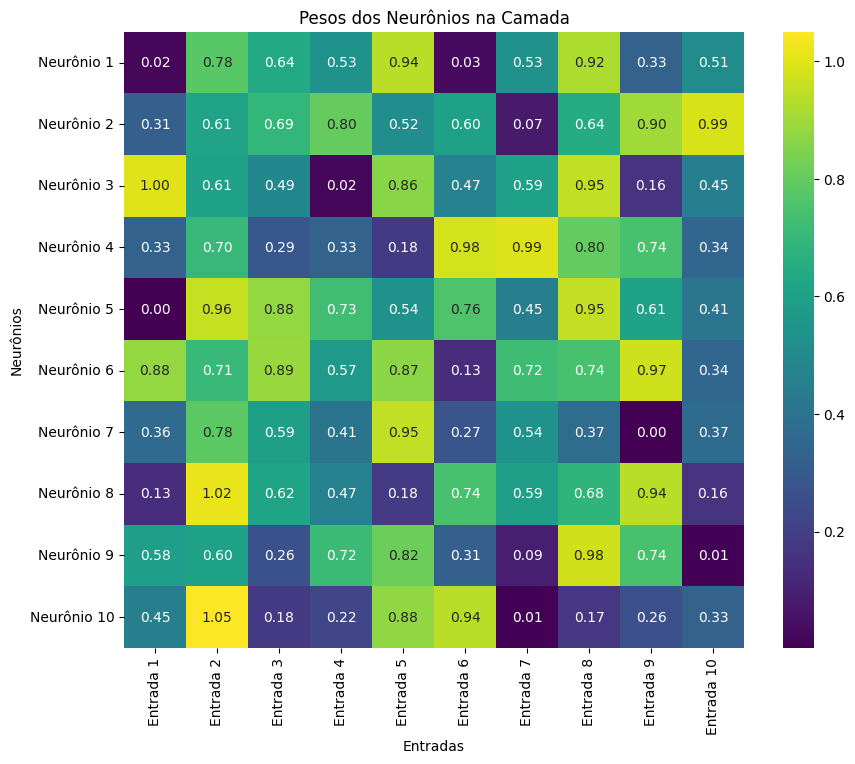

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extrair os pesos de cada neurônio na camada
pesos_camada = []
for i, neuronio in enumerate(c.neuronios):
    pesos_camada.append(neuronio.pesos)

# Converter para um array NumPy para facilitar a visualização
pesos_camada_array = np.array(pesos_camada)

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pesos_camada_array, annot=True, cmap='viridis', fmt=".2f",
            xticklabels=[f'Entrada {i+1}' for i in range(pesos_camada_array.shape[1])],
            yticklabels=[f'Neurônio {i+1}' for i in range(pesos_camada_array.shape[0])])
plt.title('Pesos dos Neurônios na Camada')
plt.xlabel('Entradas')
plt.ylabel('Neurônios')
plt.show()